# Machine Learning in Python

by [Piotr Migdał](http://p.migdal.pl/) & Dominik Krzemiński

for El Passion, 2017

## 2. Data exploration

* [Pandas](http://pandas.pydata.org/) and [Seaborn](https://seaborn.pydata.org/)
* on data from Warsaw bike usage

Data from:

* [Dane z liczników rowerowych w Warszawie](http://greenelephant.pl/shiny/rowery/) by Monika Pawłowska (code: [github.com/pawlowska/shiny-server](https://github.com/pawlowska/shiny-server))
* original source: http://rowery.um.warszawa.pl/pomiary-ruchu-rowerowego

![](imgs/rowery_ECC2014205.gif)

In [1]:
# tabular data manipulation
import pandas as pd

# plots
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading CSV data
days = pd.read_csv("data/bicycles_weather.csv", index_col=0, parse_dates=['date'])

In [3]:
# first entries
days.head()

,Al. USA - południe,Al. USA - północ,Banacha,Bazyliańska,Belwederska,Dworzec Wilenski (al. Solidarności),Dworzec Wileński Nowy( Targowa),Marszałkowska,Most Gdanski - ścieżka rowerowa,Most Gdański - ciąg pieszo-rowerowy,...,Rowery (Praska ścieżka rekreacyjna),Wybrzeże Helskie,Wysockiego,"Świętokrzyska - Emilii Plater, płd","Świętokrzyska - Emilii Plater, płn",Żwirki i Wigury/Trojdena1,Żwirki i Wigury/Trojdena2,date,value,dayname
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-01,19.9,Friday
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-02,19.2,Saturday
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-03,18.5,Sunday
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-04,19.9,Monday
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-05,17.4,Tuesday


In [4]:
# last entries
days.tail()

,Al. USA - południe,Al. USA - północ,Banacha,Bazyliańska,Belwederska,Dworzec Wilenski (al. Solidarności),Dworzec Wileński Nowy( Targowa),Marszałkowska,Most Gdanski - ścieżka rowerowa,Most Gdański - ciąg pieszo-rowerowy,...,Rowery (Praska ścieżka rekreacyjna),Wybrzeże Helskie,Wysockiego,"Świętokrzyska - Emilii Plater, płd","Świętokrzyska - Emilii Plater, płn",Żwirki i Wigury/Trojdena1,Żwirki i Wigury/Trojdena2,date,value,dayname
906,36.0,6.0,92.0,7.0,48.0,72.0,48.0,40.0,70.0,18.0,...,11.0,79.0,36.0,75.0,72.0,35.0,0.0,2017-01-22,-0.1,Sunday
907,68.0,5.0,420.0,15.0,118.0,123.0,101.0,152.0,171.0,33.0,...,7.0,209.0,59.0,303.0,233.0,218.0,2.0,2017-01-23,-2.2,Monday
908,61.0,4.0,373.0,7.0,126.0,120.0,76.0,126.0,136.0,23.0,...,6.0,181.0,33.0,266.0,233.0,177.0,4.0,2017-01-24,-4.0,Tuesday
909,73.0,7.0,394.0,NaN,146.0,110.0,77.0,149.0,145.0,24.0,...,3.0,178.0,54.0,254.0,239.0,213.0,6.0,2017-01-25,-1.4,Wednesday
910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-26,-7.8,Thursday


In [5]:
# rows and columns
days.shape

(910, 22)

In [6]:
# data for each column
days.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910 entries, 1 to 910
Data columns (total 22 columns):
Al. USA - południe                     405 non-null float64
Al. USA - północ                       405 non-null float64
Banacha                                607 non-null float64
Bazyliańska                            776 non-null float64
Belwederska                            413 non-null float64
Dworzec Wilenski (al. Solidarności)    605 non-null float64
Dworzec Wileński Nowy( Targowa)        592 non-null float64
Marszałkowska                          483 non-null float64
Most Gdanski - ścieżka rowerowa        897 non-null float64
Most Gdański - ciąg pieszo-rowerowy    897 non-null float64
NSR - Solec - ciąg pieszo-rowerowy     897 non-null float64
NSR-Solec - ścieżka rowerowa           897 non-null float64
Rowery (Praska ścieżka rekreacyjna)    391 non-null float64
Wybrzeże Helskie                       778 non-null float64
Wysockiego                             779 non-null flo

In [7]:
# selecting column and looking at its first 8 entries
days['dayname'].head(8)

1       Friday
2     Saturday
3       Sunday
4       Monday
5      Tuesday
6    Wednesday
7     Thursday
8       Friday
Name: dayname, dtype: object

In [8]:
days['dayname'].value_counts()

Saturday     130
Wednesday    130
Friday       130
Sunday       130
Tuesday      130
Monday       130
Thursday     130
Name: dayname, dtype: int64

In [9]:
days['dayname'].value_counts()

Saturday     130
Wednesday    130
Friday       130
Sunday       130
Tuesday      130
Monday       130
Thursday     130
Name: dayname, dtype: int64

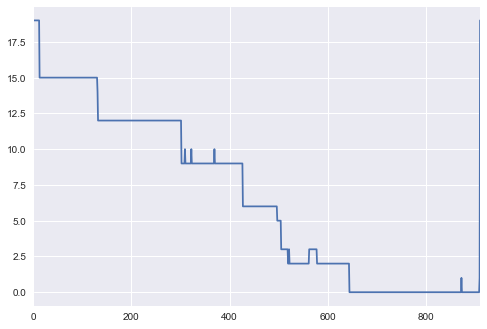

In [10]:
days.isnull().sum(axis=1).plot()

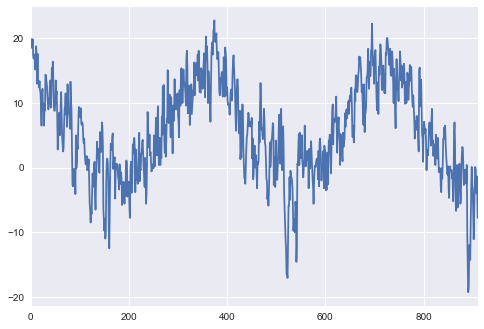

In [11]:
# temperature by day
days['value'].plot()

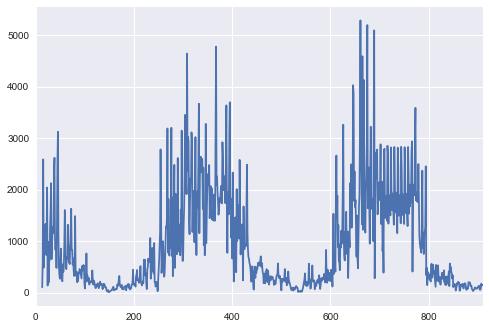

In [12]:
days['Most Gdanski - ścieżka rowerowa'].plot()

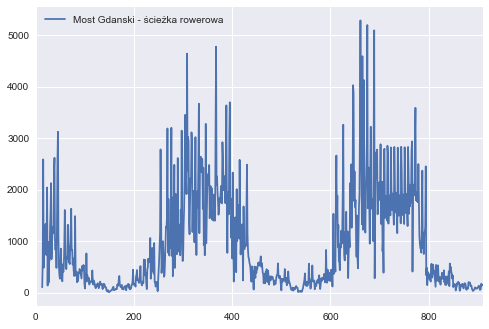

In [13]:
days[['Most Gdanski - ścieżka rowerowa']].plot()

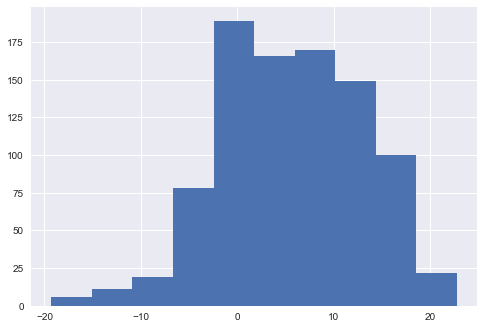

In [14]:
# number of days with each temperature
days['value'].hist()

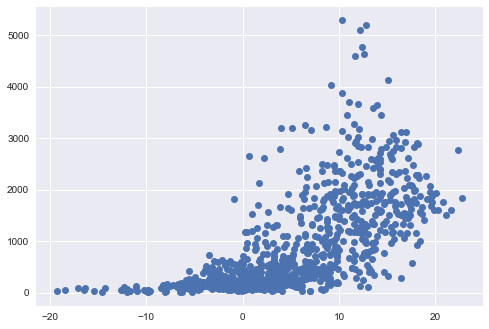

In [15]:
some_data = days[['Most Gdanski - ścieżka rowerowa', 'value']].dropna()
plt.plot(some_data['value'], some_data['Most Gdanski - ścieżka rowerowa'], 'o')

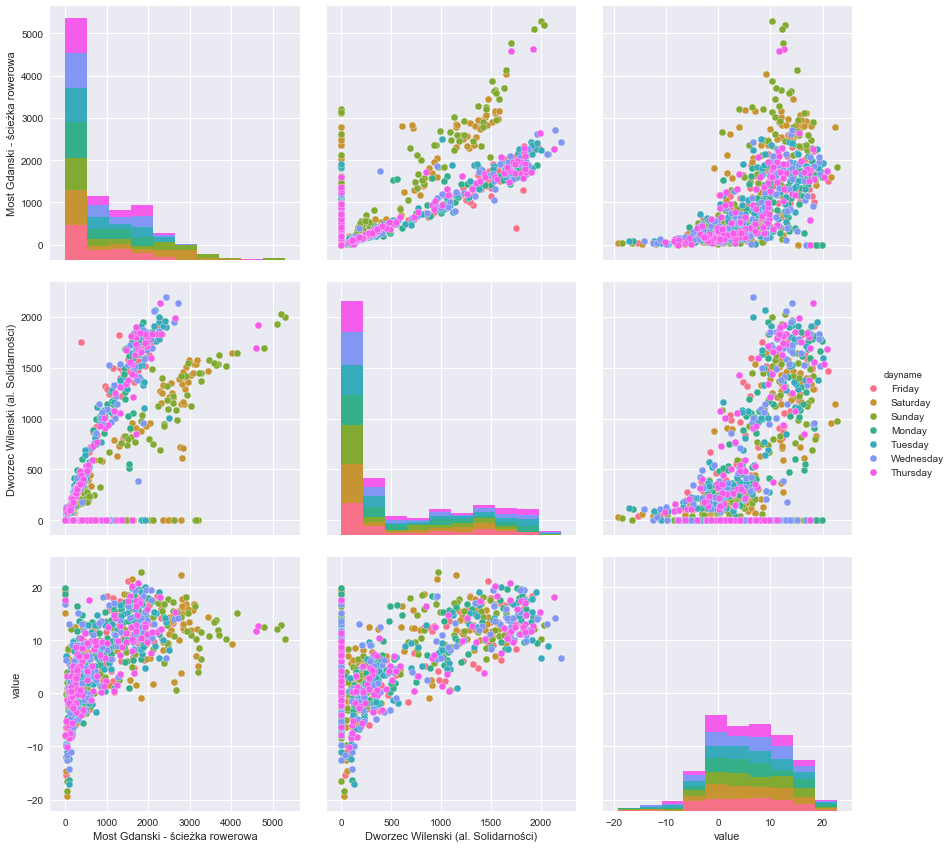

In [16]:
sns.pairplot(data=days.fillna(0),
             vars=['Most Gdanski - ścieżka rowerowa', 'Dworzec Wilenski (al. Solidarności)', 'value'],
             hue='dayname',
             size=4)

In [17]:



some_data = days[['Most Gdanski - ścieżka rowerowa', 'value']].dropna()




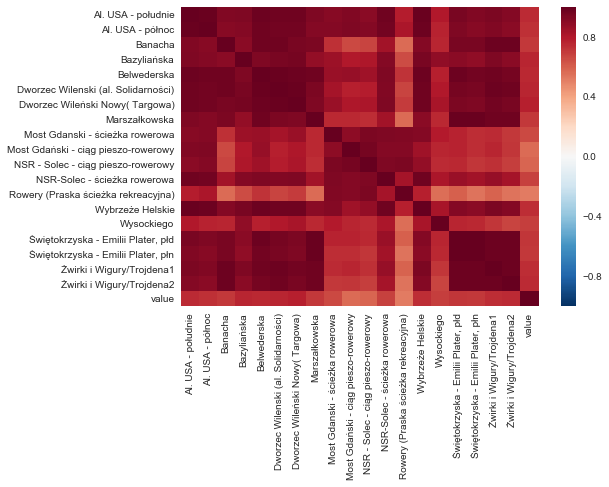

In [18]:
sns.heatmap(days.corr(), cmap='RdBu_r', vmin=-1, vmax=1)

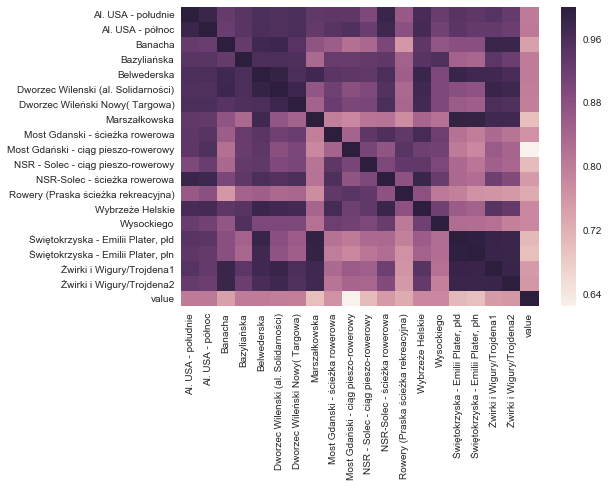

In [19]:
sns.heatmap(days.corr('spearman'))

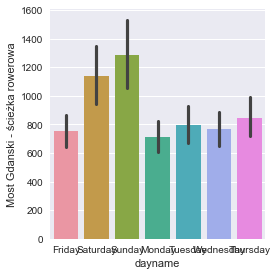

In [20]:
sns.factorplot(data=days.fillna(0),
               y='Most Gdanski - ścieżka rowerowa',
               x='dayname',
               kind='bar')

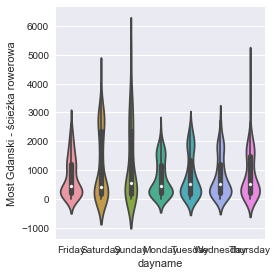

In [21]:
sns.factorplot(data=days.fillna(0),
               y='Most Gdanski - ścieżka rowerowa',
               x='dayname',
               kind='violin')

In [22]:
days.groupby('dayname').mean()

,Al. USA - południe,Al. USA - północ,Banacha,Bazyliańska,Belwederska,Dworzec Wilenski (al. Solidarności),Dworzec Wileński Nowy( Targowa),Marszałkowska,Most Gdanski - ścieżka rowerowa,Most Gdański - ciąg pieszo-rowerowy,NSR - Solec - ciąg pieszo-rowerowy,NSR-Solec - ścieżka rowerowa,Rowery (Praska ścieżka rekreacyjna),Wybrzeże Helskie,Wysockiego,"Świętokrzyska - Emilii Plater, płd","Świętokrzyska - Emilii Plater, płn",Żwirki i Wigury/Trojdena1,Żwirki i Wigury/Trojdena2,value
dayname,,,,,,,,,,,,,,,,,,,,
Friday,361.775862,203.034483,1951.045977,104.927928,718.372881,831.395349,707.047059,604.043478,766.984375,389.820312,314.046875,684.023438,193.267857,1183.603604,179.468468,1184.202899,900.840580,1193.710526,286.736842,5.442308
Monday,363.620690,202.724138,2005.482759,106.236364,700.881356,828.379310,672.623529,577.710145,723.898438,369.750000,293.117188,612.820312,226.803571,1137.540541,186.603604,1150.971014,840.260870,1159.842105,287.052632,6.048462
Saturday,367.344828,216.000000,1165.896552,100.189189,605.101695,654.586207,649.952381,407.753623,1158.281250,678.210938,545.773438,827.250000,453.410714,1171.783784,185.459459,821.565217,550.246377,788.026316,187.210526,5.773846
Sunday,434.172414,252.103448,1294.885057,108.639640,690.355932,711.162791,644.380952,384.942029,1302.757812,832.523438,650.406250,887.679688,663.696429,1298.846847,217.342342,815.173913,539.173913,923.342105,202.842105,5.874615
Thursday,422.421053,237.192982,2222.534884,117.495495,811.322034,918.411765,757.238095,646.318841,856.242188,455.671875,367.468750,742.898438,252.418182,1300.486486,206.612613,1301.869565,946.710145,1323.473684,317.078947,5.520000
Tuesday,405.500000,222.500000,2158.930233,112.513514,795.322034,878.344828,705.423529,613.260870,805.445312,394.585938,322.296875,690.148438,231.160714,1241.603604,193.383929,1247.840580,928.115942,1314.736842,324.684211,5.593077
Wednesday,365.775862,197.448276,2138.436782,109.585586,749.033898,863.298851,694.717647,599.550725,771.604651,380.286822,318.968992,664.674419,196.410714,1184.946429,190.357143,1222.144928,903.275362,1240.026316,296.000000,5.526154


## Further reading

* Data manipulation
    * [An Introduction to Scientific Python – Pandas](http://www.datadependence.com/2016/05/scientific-python-pandas/)
    * [Pandas exercises](https://github.com/guipsamora/pandas_exercises)
    * [Top Pandas functions used in GitHub repos](https://kozikow.com/2016/07/01/top-pandas-functions-used-in-github-repos/)
* Charts
    * [Overview of Python Visualization Tools](http://pbpython.com/visualization-tools-1.html)
    * [A Dramatic Tour through Python’s Data Visualization Landscape](http://blog.yhat.com/posts/python-data-viz-landscape.html)
    * [Pandas Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
    * [Matplotlib tutorial - Nicolas P. Rougier](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)